<a href="https://colab.research.google.com/github/221sakshisharma/coursera-ML-work/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Loading Data

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
27,2014,AUDI,A6 QUATTRO TDI CLEAN DIESEL,MID-SIZE,3.0,6,AS8,D,9.8,6.4,8.3,34,224
592,2014,JEEP,PATRIOT,SUV - SMALL,2.4,4,M5,X,10.3,8.3,9.4,30,216
349,2014,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A5,X,23.9,17.8,21.2,13,488
846,2014,NISSAN,JUKE,STATION WAGON - SMALL,1.6,4,M6,Z,9.5,7.6,8.6,33,198
305,2014,DODGE,CHARGER AWD,FULL-SIZE,3.6,6,A8,X,12.8,8.6,10.9,26,251


# Understanding the Data

In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
df = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

In [ ]:
df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
831,2.0,4,9.0,207
403,2.0,4,7.8,179
406,2.0,4,10.6,170
3,3.5,6,11.1,255
873,3.8,6,11.0,253


In [ ]:
df.describe()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


### Data Visualization

A histogram is a type of bar chart that shows the distribution of a dataset.

What it shows:
1. X-axis: Intervals (e.g., 0–10, 10–20, 20–30).

2. Y-axis: Frequency or count of data points in each interval.

What it tells you:
* The shape of the data distribution (e.g., normal, skewed, bimodal).

* Where the data is concentrated (e.g., most values fall between 50 and 60).

* The spread of the data (how wide the values are distributed).

* The presence of outliers (e.g., unusually high or low values).

array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

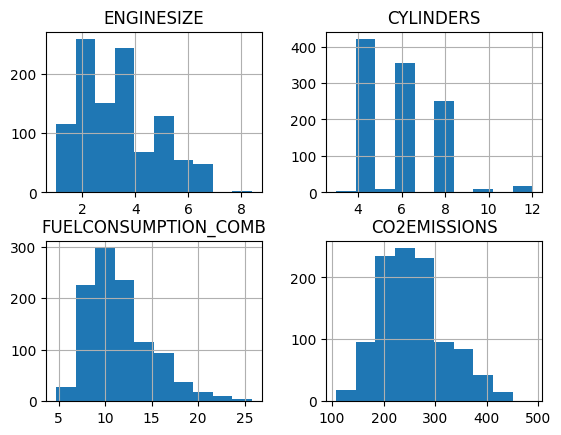

In [ ]:
df.hist()

Text(0, 0.5, 'CO2 Emissions')

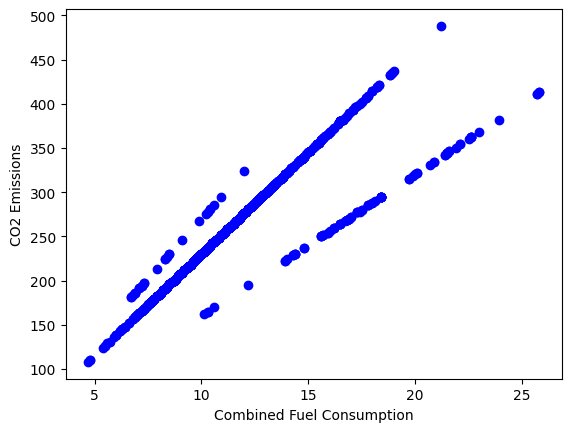

In [ ]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Combined Fuel Consumption")
plt.ylabel("CO2 Emissions")

We can see that combined fuel consumption is having a linear relationship with CO2 emissions.

Text(0, 0.5, 'Emission')

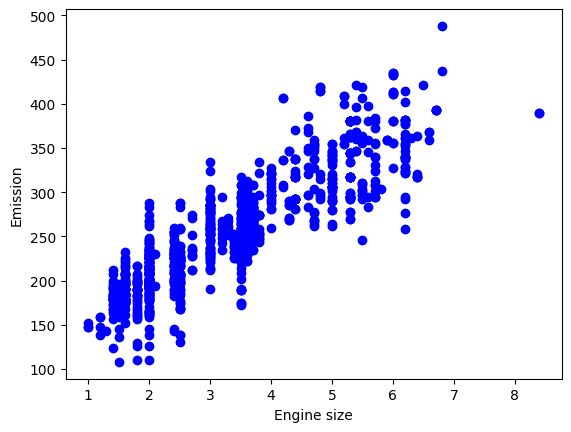

In [ ]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#Engine Size as Input Feature

## Extracting Input Features and labels from the Dataset

In [ ]:
X = df["ENGINESIZE"].to_numpy()
y = df["CO2EMISSIONS"].to_numpy()

## Splitting the Data into Training and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
np.shape(X_train)

(853,)

In [ ]:
np.shape(X_test)

(214,)

## Building a Simple Linear Regression Model

[Scikit-learn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn import linear_model

##### Creating the model object

In [ ]:
regressor = linear_model.LinearRegression()

##### Training the model

Scikit-learn expects features to be in 2D shape of (n_observations, n_features) which in this case is (1067, 1)

In [ ]:
regressor.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

##### Printing the Coefficients

In [ ]:
slope = regressor.coef_[0]

np.float64(38.992978724434074)

In [ ]:
slope

np.float64(38.992978724434074)

In [ ]:
bias = regressor.intercept_

In [ ]:
bias

np.float64(126.28970217408721)

#####Visualising the Trained Model

Text(0, 0.5, 'CO2 Emissions')

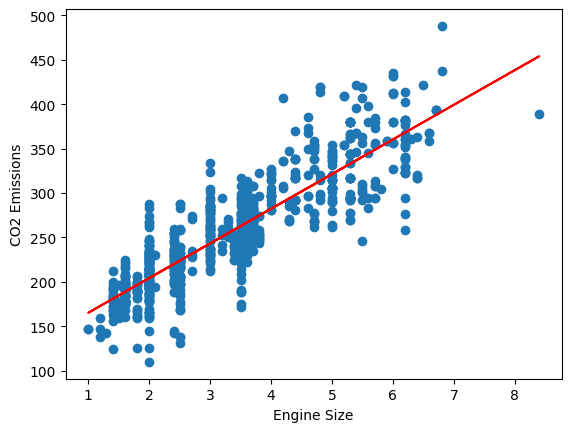

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, X_train*slope + bias, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_hat = regressor.predict(X_test.reshape(-1, 1))

In [ ]:
mean_absolute_error(y_test, y_hat)

24.09725741170784

In [ ]:
np.sqrt(mean_squared_error(y_test, y_hat))

np.float64(31.399652374309813)

In [ ]:
r2_score(y_test, y_hat)

0.7615595731934373

##### Visualising the model on test data

Text(0, 0.5, 'CO2 Emissions')

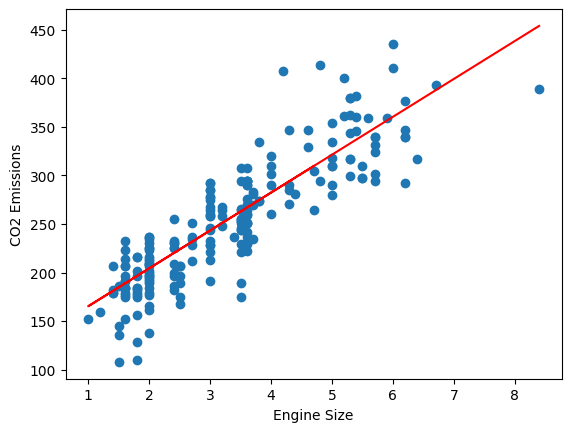

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, X_test*slope + bias, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

#Combined Fuel Consumption as Input Feature

## Extracting Input Features and labels from the Dataset

In [ ]:
X = df["FUELCONSUMPTION_COMB"].to_numpy()
y = df["CO2EMISSIONS"].to_numpy()

## Splitting the Data into Training and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
np.shape(X_train)

(853,)

In [ ]:
np.shape(X_test)

(214,)

## Building a Simple Linear Regression Model

In [ ]:
from sklearn import linear_model

##### Creating the model object

In [ ]:
regressor = linear_model.LinearRegression()

##### Training the model

Scikit-learn expects features to be in 2D shape of (n_observations, n_features) which in this case is (1067, 1)

In [ ]:
regressor.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

##### Printing the Coefficients

In [ ]:
slope = regressor.coef_[0]

In [ ]:
slope

np.float64(16.180900781199195)

In [ ]:
bias = regressor.intercept_

In [ ]:
bias

np.float64(69.10302617988444)

#####Visualising the Trained Model

Text(0, 0.5, 'CO2 Emissions')

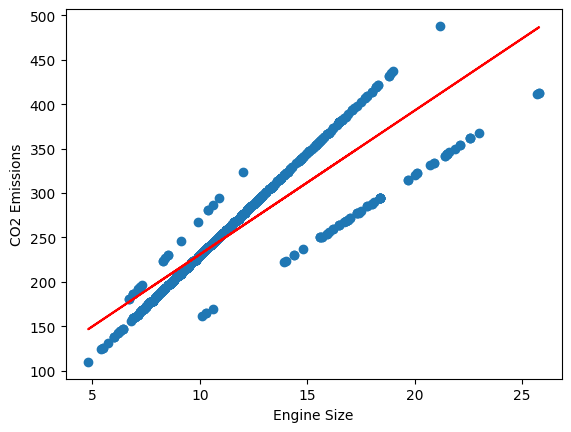

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, X_train*slope + bias, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_hat = regressor.predict(X_test.reshape(-1, 1))

In [ ]:
mean_absolute_error(y_test, y_hat)

20.441911472549577

In [ ]:
np.sqrt(mean_squared_error(y_test, y_hat))

np.float64(28.238885087937177)

In [ ]:
r2_score(y_test, y_hat)

0.8071474868274242

##### Visualising the model on test data

Text(0, 0.5, 'CO2 Emissions')

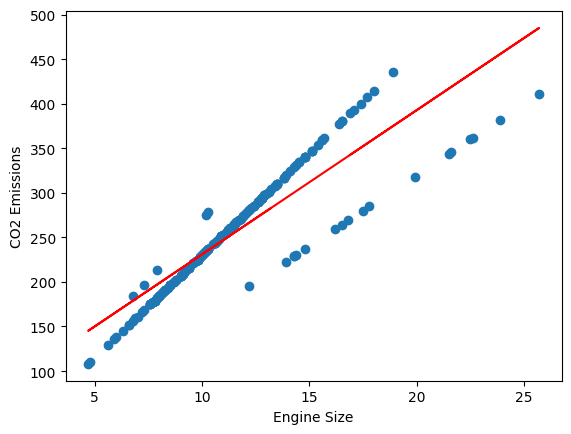

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, X_test*slope + bias, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")